# 情感词典

### 情感词典

### 情感值

### 情感分析任务

## 英文情感词典

In [1]:
import pandas as pd     # 数据表
import jieba     # 中文分词

D:\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df_eng = pd.read_excel('text_analysis_twitter_sample.xlsx', index_col = 0)

In [3]:
df_eng.head()

,index,id,screen_name,time,link,text,source
0,49374,890587249372524544,auctnr1,2017-07-27T10:58:41-04:00,https://www.twitter.com/Reuters/statuses/89058...,"RT @Reuters MORE: Top U.S. general says, given...",Twitter for iPhone
1,83246,899354463055618048,SenatorTester,2017-08-20T15:36:27-04:00,https://www.twitter.com/SenatorTester/statuses...,T-minus 2 days until our first-ever Last Best ...,Twitter Web Client
2,100988,903272105738985472,KeithRothfus,2017-08-31T11:03:46-04:00,https://www.twitter.com/KeithRothfus/statuses/...,Please know that help is available. Visit http...,Twitter Web Client
3,193395,921001114409021440,HASCRepublicans,2017-10-19T09:12:31-04:00,https://www.twitter.com/HASCRepublicans/status...,Literally flying the wings off the A-10 in fig...,Twitter Web Client
4,12662,884911451449774080,SteveKnight25,2017-07-11T19:05:05-04:00,https://www.twitter.com/SteveKnight25/statuses...,Today the House unanimously passed my bill #HR...,Twitter Web Client


### NRC情感词典（NRC Emotion Lexicon）

In [4]:
nrc = pd.read_excel('NRC-Emotion-Lexicon.xlsx', usecols='A, F, AP:AY')
nrc = nrc.rename(columns={'English Word':'Engword', 'Chinese (simplified) Translation (Google Translate)':'Chnword'})
nrc.head()

D:\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Engword,Chnword,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,吓了一跳,0,0,0,0,0,0,0,0,0,0
1,abacus,算盘,0,0,0,0,0,0,0,0,0,1
2,abandon,放弃,0,1,0,0,0,1,0,1,0,0
3,abandoned,弃,0,1,1,0,0,1,0,1,0,0
4,abandonment,放弃,0,1,1,0,0,1,0,1,1,0


#### 英文语料

In [5]:
Positive, Negative, Anger, Anticipation, Disgust, Fear, Joy, Sadness, Surprise, Trust = [], [], [], [], [], [], [], [], [], []

for idx, row in nrc.iterrows():
    if row['Positive'] == 1:
        Positive.append(row['Engword'])
    if row['Negative'] == 1:
        Negative.append(row['Engword'])
    if row['Anger'] == 1:
        Anger.append(row['Engword'])
    if row['Anticipation'] == 1:
        Anticipation.append(row['Engword'])
    if row['Disgust'] == 1:
        Disgust.append(row['Engword'])
    if row['Fear'] == 1:
        Fear.append(row['Engword'])
    if row['Joy'] == 1:
        Joy.append(row['Engword'])
    if row['Sadness'] == 1:
        Sadness.append(row['Engword'])
    if row['Surprise'] == 1:
        Surprise.append(row['Engword'])
    if row['Trust'] == 1:
        Trust.append(row['Engword'])

In [6]:
emo_nrc_eng = pd.DataFrame(columns=['length_nrc', 'positive_nrc', 'negative_nrc',
                                    'anger_nrc', 'anticipation_nrc', 'disgust_nrc', 'fear_nrc',
                                    'joy_nrc', 'sadness_nrc', 'surprise_nrc', 'trust_nrc'])

for de in df_eng.index:
    positive, negative, anger, anticipation, disgust, fear, joy, sadness, surprise, trust = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    text = df_eng['text'][de].lower()
    wordlist = text.split()
    wordset = set(wordlist)
    wordfreq = []
    
    for word in wordset:
        freq = wordlist.count(word)
        if word in Positive:
            positive += freq
        if word in Negative:
            negative += freq
        if word in Anger:
            anger += freq
        if word in Anticipation:
            anticipation += freq
        if word in Disgust:
            disgust += freq
        if word in Fear:
            fear += freq
        if word in Joy:
            joy += freq
        if word in Sadness:
            sadness += freq
        if word in Surprise:
            surprise += freq
        if word in Trust:
            trust += freq
            
    emotion_info = {
        'length_nrc': len(wordlist),
        'positive_nrc': positive,
        'negative_nrc': negative,
        'anger_nrc': anger,
        'anticipation_nrc': anticipation,
        'disgust_nrc': disgust,
        'fear_nrc': fear,
        'joy_nrc': joy,
        'sadness_nrc': sadness,
        'surprise_nrc': surprise,
        'trust_nrc': trust
    }
    
    emo_info = pd.DataFrame([emotion_info])
    emo_nrc_eng = pd.concat([emo_nrc_eng, emo_info], ignore_index=True)
    
emo_nrc_eng.head()

,length_nrc,positive_nrc,negative_nrc,anger_nrc,anticipation_nrc,disgust_nrc,fear_nrc,joy_nrc,sadness_nrc,surprise_nrc,trust_nrc
0,22,2,0,0,1,0,0,0,0,0,2
1,18,1,0,0,1,0,0,1,0,1,1
2,16,1,0,0,0,0,0,0,0,0,0
3,22,1,1,1,0,0,2,0,0,0,0
4,20,0,1,1,0,1,1,0,1,1,1


In [7]:
df_eng = pd.concat([df_eng, emo_nrc_eng], axis=1)
df_eng.head()

,index,id,screen_name,time,link,text,source,length_nrc,positive_nrc,negative_nrc,anger_nrc,anticipation_nrc,disgust_nrc,fear_nrc,joy_nrc,sadness_nrc,surprise_nrc,trust_nrc
0,49374,890587249372524544,auctnr1,2017-07-27T10:58:41-04:00,https://www.twitter.com/Reuters/statuses/89058...,"RT @Reuters MORE: Top U.S. general says, given...",Twitter for iPhone,22,2,0,0,1,0,0,0,0,0,2
1,83246,899354463055618048,SenatorTester,2017-08-20T15:36:27-04:00,https://www.twitter.com/SenatorTester/statuses...,T-minus 2 days until our first-ever Last Best ...,Twitter Web Client,18,1,0,0,1,0,0,1,0,1,1
2,100988,903272105738985472,KeithRothfus,2017-08-31T11:03:46-04:00,https://www.twitter.com/KeithRothfus/statuses/...,Please know that help is available. Visit http...,Twitter Web Client,16,1,0,0,0,0,0,0,0,0,0
3,193395,921001114409021440,HASCRepublicans,2017-10-19T09:12:31-04:00,https://www.twitter.com/HASCRepublicans/status...,Literally flying the wings off the A-10 in fig...,Twitter Web Client,22,1,1,1,0,0,2,0,0,0,0
4,12662,884911451449774080,SteveKnight25,2017-07-11T19:05:05-04:00,https://www.twitter.com/SteveKnight25/statuses...,Today the House unanimously passed my bill #HR...,Twitter Web Client,20,0,1,1,0,1,1,0,1,1,1


In [8]:
df_chn = pd.read_excel('热辣滚烫虎扑帖子.xlsx', index_col=False) #导入文件

In [9]:
df_chn.head()

,评论,时间,点赞数,地区,评论数
0,不去，倒贴钱也不去,2024-02-10,184,广西,8
1,虽然是拿钱干活 但往外发这样的说辞自己不觉得恶心么,2024-02-10,13,湖北,0
2,抄袭日本百元之恋,2024-02-10,15,山东,3
3,明天一定要去电影院支持哦,2024-02-10,8,湖南,1
4,不去，倒贴钱也不去,2024-02-10,184,广西,8


#### 中文语料

In [10]:
Positive, Negative, Anger, Anticipation, Disgust, Fear, Joy, Sadness, Surprise, Trust = [], [], [], [], [], [], [], [], [], []

for idx, row in nrc.iterrows():
    if row['Positive'] == 1:
        Positive.append(row['Chnword'])
    if row['Negative'] == 1:
        Negative.append(row['Chnword'])
    if row['Anger'] == 1:
        Anger.append(row['Chnword'])
    if row['Anticipation'] == 1:
        Anticipation.append(row['Chnword'])
    if row['Disgust'] == 1:
        Disgust.append(row['Chnword'])
    if row['Fear'] == 1:
        Fear.append(row['Chnword'])
    if row['Joy'] == 1:
        Joy.append(row['Chnword'])
    if row['Sadness'] == 1:
        Sadness.append(row['Chnword'])
    if row['Surprise'] == 1:
        Surprise.append(row['Chnword'])
    if row['Trust'] == 1:
        Trust.append(row['Chnword'])

In [11]:
emo_nrc_chn = pd.DataFrame(columns=['length_nrc', 'positive_nrc', 'negative_nrc',
                                    'anger_nrc', 'anticipation_nrc', 'disgust_nrc', 'fear_nrc',
                                    'joy_nrc', 'sadness_nrc', 'surprise_nrc', 'trust_nrc'])

for dc in df_chn.index:
    positive, negative, anger, anticipation, disgust, fear, joy, sadness, surprise, trust = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    wordlist = list(jieba.cut(df_chn['评论'][dc]))
    wordset = set(wordlist)
    wordfreq = []
    
    for word in wordset:
        freq = wordlist.count(word)
        if word in Positive:
            positive += freq
        if word in Negative:
            negative += freq
        if word in Anger:
            anger += freq
        if word in Anticipation:
            anticipation += freq
        if word in Disgust:
            disgust += freq
        if word in Fear:
            fear += freq
        if word in Joy:
            joy += freq
        if word in Sadness:
            sadness += freq
        if word in Surprise:
            surprise += freq
        if word in Trust:
            trust += freq
            
    emotion_info = {
        'length_nrc': len(wordlist),
        'positive_nrc': positive,
        'negative_nrc': negative,
        'anger_nrc': anger,
        'anticipation_nrc': anticipation,
        'disgust_nrc': disgust,
        'fear_nrc': fear,
        'joy_nrc': joy,
        'sadness_nrc': sadness,
        'surprise_nrc': surprise,
        'trust_nrc': trust
    }
    
    emo_info = pd.DataFrame([emotion_info])
    emo_nrc_chn = pd.concat([emo_nrc_chn, emo_info], ignore_index=True)

emo_nrc_chn.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\123\AppData\Local\Temp\jieba.cache
Loading model cost 0.921 seconds.
Prefix dict has been built successfully.


,length_nrc,positive_nrc,negative_nrc,anger_nrc,anticipation_nrc,disgust_nrc,fear_nrc,joy_nrc,sadness_nrc,surprise_nrc,trust_nrc
0,7,1,0,1,1,0,0,1,0,1,1
1,16,1,1,1,1,1,0,1,1,1,1
2,4,0,1,0,0,1,0,0,0,0,0
3,7,1,0,0,1,0,0,0,0,0,0
4,7,1,0,1,1,0,0,1,0,1,1


In [12]:
positive_mean = emo_nrc_chn['positive_nrc'].mean()
negative_mean = emo_nrc_chn['negative_nrc'].mean()
disgust_mean = emo_nrc_chn['disgust_nrc'].mean()
anger

print(positive_mean,negative_mean,disgust_mean)

1.161507402422611 0.7484137665833493 0.34070371082484135


In [13]:
df_chn = pd.concat([df_chn, emo_nrc_chn], axis=1)
df_chn.head()

,评论,时间,点赞数,地区,评论数,length_nrc,positive_nrc,negative_nrc,anger_nrc,anticipation_nrc,disgust_nrc,fear_nrc,joy_nrc,sadness_nrc,surprise_nrc,trust_nrc
0,不去，倒贴钱也不去,2024-02-10,184,广西,8,7,1,0,1,1,0,0,1,0,1,1
1,虽然是拿钱干活 但往外发这样的说辞自己不觉得恶心么,2024-02-10,13,湖北,0,16,1,1,1,1,1,0,1,1,1,1
2,抄袭日本百元之恋,2024-02-10,15,山东,3,4,0,1,0,0,1,0,0,0,0,0
3,明天一定要去电影院支持哦,2024-02-10,8,湖南,1,7,1,0,0,1,0,0,0,0,0,0
4,不去，倒贴钱也不去,2024-02-10,184,广西,8,7,1,0,1,1,0,0,1,0,1,1


### 大连理工大学情感词典（DLUT Emotion Lexicon）

In [14]:
dlut = pd.read_excel('DLUT-Emotion-Lexicon.xlsx', usecols=['词语', '词性种类', '情感分类', '强度'])
dlut.head()

,词语,词性种类,情感分类,强度
0,脏乱,adj,NN,7
1,糟报,adj,NN,5
2,早衰,adj,NE,5
3,责备,verb,NN,5
4,贼眼,noun,NN,5


In [15]:
# 整理情感词典
Happy, Good, Surprise, Anger, Sad, Fear, Disgust  = [], [], [], [], [], [], []

for idx, row in dlut.iterrows():
    if row['情感分类'] in ['PA', 'PE']:
        Happy.append(row['词语'])
    if row['情感分类'] in ['PD', 'PH', 'PG', 'PB', 'PK']:
        Good.append(row['词语']) 
    if row['情感分类'] in ['PC']:
        Surprise.append(row['词语'])     
    if row['情感分类'] in ['NA']:
        Anger.append(row['词语'])    
    if row['情感分类'] in ['NB', 'NJ', 'NH', 'PF']:
        Sad.append(row['词语'])
    if row['情感分类'] in ['NI', 'NC', 'NG']:
        Fear.append(row['词语'])
    if row['情感分类'] in ['NE', 'ND', 'NN', 'NK', 'NL']:
        Disgust.append(row['词语'])
Positive = Happy + Good + Surprise
Negative = Anger + Sad + Fear + Disgust

In [17]:
emo_dlut = pd.DataFrame(columns=['length_dlut', 'positive_dlut', 'negative_dlut',
                                'anger_dlut', 'disgust_dlut', 'fear_dlut', 'good_dlut',
                                'sadness_dlut', 'surprise_dlut', 'happy_dlut'])

for dc in df_chn.index:
    positive, negative, anger, disgust, fear, sad, surprise, good, happy = 0, 0, 0, 0, 0, 0, 0, 0, 0
    wordlist = list(jieba.cut(df_chn['评论'][dc]))
    wordset = set(wordlist)
    wordfreq = []
    for word in wordset:
        freq = wordlist.count(word)
        if word in Positive:
            positive += freq
        if word in Negative:
            negative += freq
        if word in Anger:
            anger += freq
        if word in Disgust:
            disgust += freq
        if word in Fear:
            fear += freq
        if word in Sad:
            sad += freq
        if word in Surprise:
            surprise += freq
        if word in Good:
            good += freq
        if word in Happy:
            happy += freq
            
    emotion_info = {
        'length_dlut': len(wordlist),
        'positive_dlut': positive,
        'negative_dlut': negative,
        'anger_dlut': anger,
        'disgust_dlut': disgust,
        'fear_dlut': fear,
        'good_dlut': good,
        'sadness_dlut': sad,
        'surprise_dlut': surprise,
        'happy_dlut': happy
    }
    
    emo_info = pd.DataFrame([emotion_info])
    emo_dlut = pd.concat([emo_dlut, emo_info], ignore_index=True)
    
emo_dlut.head()

,length_dlut,positive_dlut,negative_dlut,anger_dlut,disgust_dlut,fear_dlut,good_dlut,sadness_dlut,surprise_dlut,happy_dlut
0,7,0,0,0,0,0,0,0,0,0
1,16,0,1,0,1,0,0,0,0,0
2,4,0,1,0,1,0,0,0,0,0
3,7,2,0,0,0,0,2,0,0,0
4,7,0,0,0,0,0,0,0,0,0


In [18]:
df_chn = pd.concat([df_chn, emo_dlut], axis=1)
df_chn.head()

,评论,时间,点赞数,地区,评论数,length_nrc,positive_nrc,negative_nrc,anger_nrc,anticipation_nrc,...,length_dlut,positive_dlut,negative_dlut,anger_dlut,disgust_dlut,fear_dlut,good_dlut,sadness_dlut,surprise_dlut,happy_dlut
0,不去，倒贴钱也不去,2024-02-10,184,广西,8,7,1,0,1,1,...,7,0,0,0,0,0,0,0,0,0
1,虽然是拿钱干活 但往外发这样的说辞自己不觉得恶心么,2024-02-10,13,湖北,0,16,1,1,1,1,...,16,0,1,0,1,0,0,0,0,0
2,抄袭日本百元之恋,2024-02-10,15,山东,3,4,0,1,0,0,...,4,0,1,0,1,0,0,0,0,0
3,明天一定要去电影院支持哦,2024-02-10,8,湖南,1,7,1,0,0,1,...,7,2,0,0,0,0,2,0,0,0
4,不去，倒贴钱也不去,2024-02-10,184,广西,8,7,1,0,1,1,...,7,0,0,0,0,0,0,0,0,0


In [20]:
# 计算情感比例
emotion_proportions = emo_dlut[['anger_dlut', 'disgust_dlut', 'fear_dlut', 'good_dlut',
                                'sadness_dlut', 'surprise_dlut', 'happy_dlut']].mean()

# 将情感标签映射为中文
emotion_labels = {
    'anger_dlut': '愤怒',
    'disgust_dlut': '厌恶',
    'fear_dlut': '恐惧',
    'good_dlut': '赞赏',
    'sadness_dlut': '悲伤',
    'surprise_dlut': '惊讶',
    'happy_dlut': '开心'
}
emotion_proportions.index = emotion_proportions.index.map(emotion_labels)

In [22]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

C:\Users\123\AppData\Local\Temp\ipykernel_27688\3897347118.py:6: UserWarning: Glyph 12298 (\N{LEFT DOUBLE ANGLE BRACKET}) missing from current font.
  plt.tight_layout()
C:\Users\123\AppData\Local\Temp\ipykernel_27688\3897347118.py:6: UserWarning: Glyph 28909 (\N{CJK UNIFIED IDEOGRAPH-70ED}) missing from current font.
  plt.tight_layout()
C:\Users\123\AppData\Local\Temp\ipykernel_27688\3897347118.py:6: UserWarning: Glyph 36771 (\N{CJK UNIFIED IDEOGRAPH-8FA3}) missing from current font.
  plt.tight_layout()
C:\Users\123\AppData\Local\Temp\ipykernel_27688\3897347118.py:6: UserWarning: Glyph 28378 (\N{CJK UNIFIED IDEOGRAPH-6EDA}) missing from current font.
  plt.tight_layout()
C:\Users\123\AppData\Local\Temp\ipykernel_27688\3897347118.py:6: UserWarning: Glyph 28907 (\N{CJK UNIFIED IDEOGRAPH-70EB}) missing from current font.
  plt.tight_layout()
C:\Users\123\AppData\Local\Temp\ipykernel_27688\3897347118.py:6: UserWarning: Glyph 12299 (\N{RIGHT DOUBLE ANGLE BRACKET}) missing from current fo

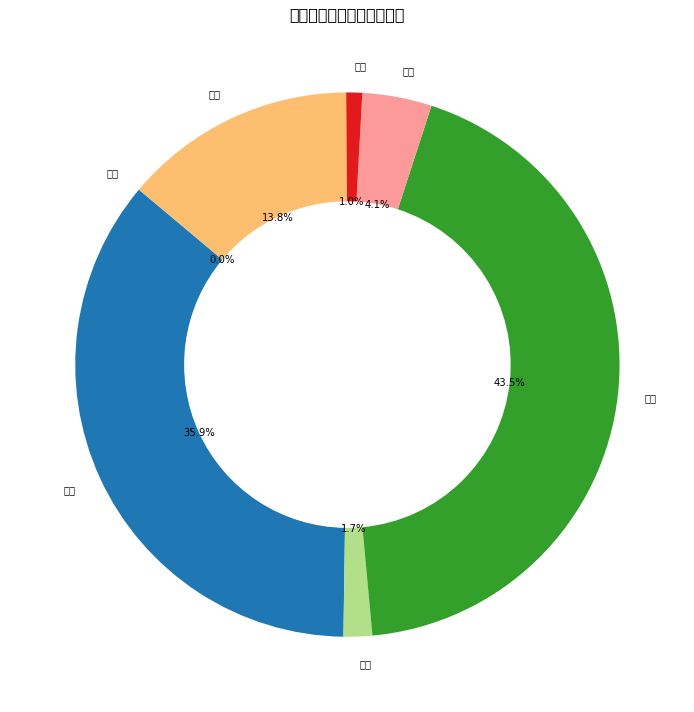

In [23]:
# 绘制饼图
plt.figure(figsize=(10, 10))
plt.pie(emotion_proportions, labels=emotion_proportions.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(emotion_proportions))),
        startangle=140, wedgeprops=dict(width=0.4))
plt.title('《热辣滚烫》虎扑情感比例', fontsize=16)
plt.tight_layout()
plt.show()

------------------------